# Heart Disease Prediction
It's my very first notebook and exploratory. So please if you have any suggestion drop it in comment. Thank you :)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Full Form of the column Headings
1. **Age**: Age in years
2. **Sex**: Male (1) or Female(0)
3. **CP**: pain has values between
    - Value 0: typical angina
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: asymptomatic 0-3.
4. **Resting Blood Pressure(trestbps)**: resting blood pressure (in mmHg on admission to the hospital)
5. **Cholestorol**: serum cholestoral in mg/dl
6. **fbs(Fast blood sugar)** : blood sugar while fasting (>120 mg/dl) (1=true/0=false)
7. **Rest ecg** : resting ecg graph
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **thalach**: max heart rate
9. **exang** : Exercise induced angina is chest pain while exercising or doing any physical activity.(1 = yes; 0 = no)
10. **Old peak** : ST Depression is the difference between value of ECG at rest and after exercise.
11. **ST Slope** : is the tangent to the depression value.
12. **The number of major blood vessels supplying blood to heart blocked.**
13. **Thal** :The Types of thalassemia. (0=normal ,1= fixed defect ,2=reversable defect)
14. **Target** : Here 1 denotes heart attack and 0 denotes didn't occur

# Exploratory Data Analysis

## Load Data

In [ ]:
data = pd.read_csv('../input/heart-disease-uci/heart.csv')
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [ ]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'serum_cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

data.columns.unique()

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate', 'exercise_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [ ]:
data.describe().round(2)

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


youngest people that have a heart attack is on 29 old.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     303 non-null    int64  
 1   sex                     303 non-null    int64  
 2   chest_pain_type         303 non-null    int64  
 3   resting_blood_pressure  303 non-null    int64  
 4   serum_cholesterol       303 non-null    int64  
 5   fasting_blood_sugar     303 non-null    int64  
 6   rest_ecg                303 non-null    int64  
 7   max_heart_rate          303 non-null    int64  
 8   exercise_angina         303 non-null    int64  
 9   st_depression           303 non-null    float64
 10  st_slope                303 non-null    int64  
 11  num_major_vessels       303 non-null    int64  
 12  thalassemia             303 non-null    int64  
 13  target                  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.

seems the data doesn't have null value

## Try to visualize data

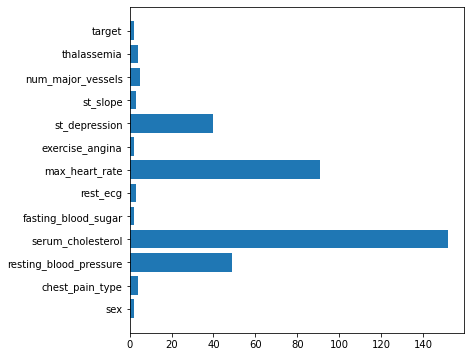

In [ ]:
col_class = [
    len(data.sex.unique()),
    len(data.chest_pain_type.unique()),
    len(data.resting_blood_pressure.unique()),
    len(data.serum_cholesterol.unique()),
    len(data.fasting_blood_sugar.unique()),
    len(data.rest_ecg.unique()),
    len(data.max_heart_rate.unique()),
    len(data.exercise_angina.unique()),
    len(data.st_depression.unique()),
    len(data.st_slope.unique()),
    len(data.num_major_vessels.unique()),
    len(data.thalassemia.unique()),
    len(data.target.unique()),
]

plt.figure(figsize=(6,6))
plt.barh(data.columns.unique()[1:], col_class)
plt.show()

Total people safe = 138
Total people diseased = 165


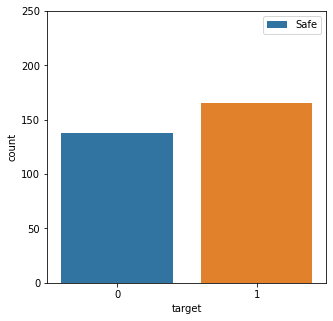

In [ ]:
print('Total people safe = %d' % len(data[data.target == 0]))
print('Total people diseased = %d' % len(data[data.target == 1]))

plt.figure(figsize=(5,5))
sns.countplot(data.target)
plt.ylim(0,250)
plt.legend(['Safe', 'Diseased'])
plt.show()

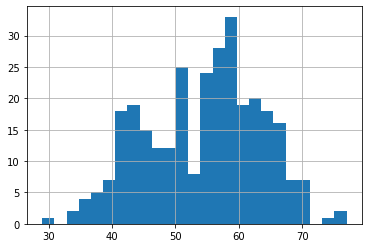

In [ ]:
data['age'].hist(bins=25)

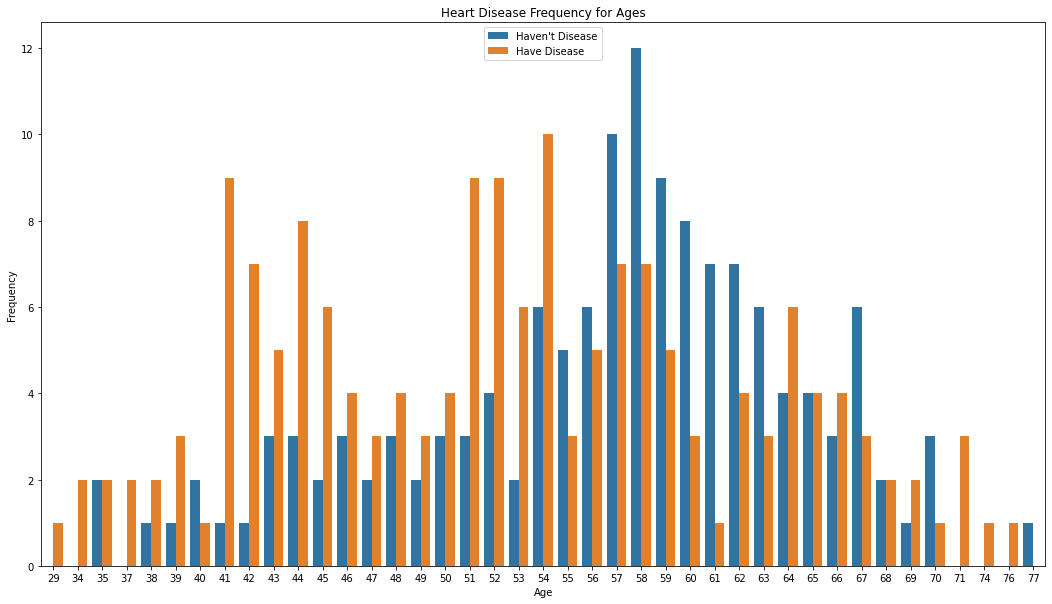

In [ ]:
plt.figure(figsize=(18, 10))
sns.countplot(x='age', hue='target', data=data)
plt.legend(["Haven't Disease", "Have Disease"])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data['age'].mode()

0    58
dtype: int64

As we can see that people have this disease is mostly on 58 years old

Let's try to grouping them into three groups:
- young
- middle-age
- old

Total young people 19
Total middle-aged people 133
Total old people 151


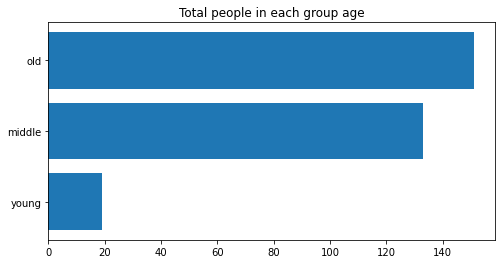

In [ ]:
young = data[data.age <= 40]
middle = data[(data.age > 40) & (data.age <= 55)]
old = data[data.age > 55]

print('Total young people %d' % len(young))
print('Total middle-aged people %d' % len(middle))
print('Total old people %d' % len(old))

ax = plt.figure(figsize=(8,4))
plt.barh(['young', 'middle', 'old'], [len(young), len(middle), len(old)])
plt.title('Total people in each group age')
plt.show()

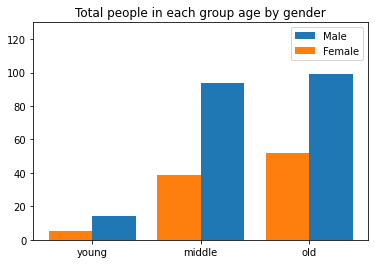

In [ ]:
age_m = [len(young[young.sex==1]), len(middle[middle.sex==1]), len(old[old.sex==1])]
age_f = [len(young[young.sex==0]), len(middle[middle.sex==0]), len(old[old.sex==0])]
xpos = np.arange(0,3)

plt.xticks(xpos, ['young', 'middle', 'old'])
plt.bar(xpos+0.2, age_m, width=0.4, label='Male')
plt.bar(xpos-0.2, age_f, width=0.4, label='Female')
plt.title('Total people in each group age by gender')
plt.ylim(0,130)
plt.legend()
plt.show()

each group dominated by male

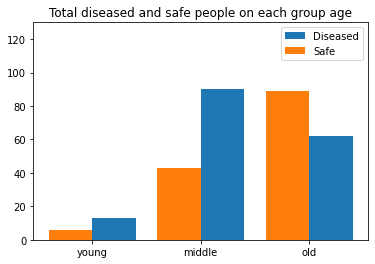

In [ ]:
age_m = [len(young[young.target==1]), len(middle[middle.target==1]), len(old[old.target==1])]
age_f = [len(young[young.target==0]), len(middle[middle.target==0]), len(old[old.target==0])]
xpos = np.arange(0,3)

plt.xticks(xpos, ['young', 'middle', 'old'])
plt.bar(xpos+0.2, age_m, width=0.4, label='Diseased')
plt.bar(xpos-0.2, age_f, width=0.4, label='Safe')
plt.title('Total diseased and safe people on each group age')
plt.ylim(0,130)
plt.legend()
plt.show()

unfortunately for young and middle group is dominted by people having heart disease

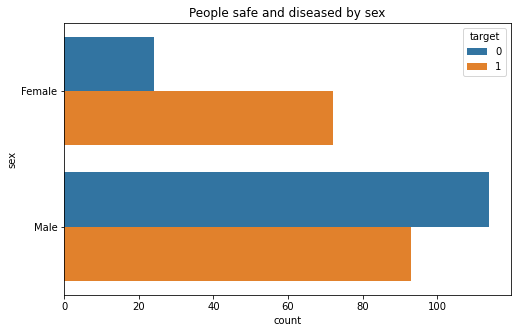

In [ ]:
plt.figure(figsize=(8,5))
plt.title('People safe and diseased by sex')
sns.countplot(y=data.sex, hue=data.target)
plt.yticks(np.arange(0,2), ['Female', 'Male'])
plt.show()

but by sex, female dominating in heart disease

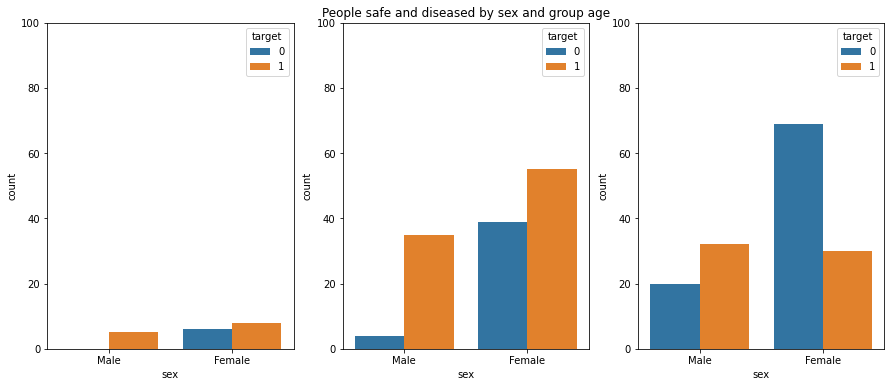

In [ ]:
fig = plt.figure(figsize=(15,6))
plt.title('People safe and diseased by sex and group age')
plt.axis('off')

ax1 = fig.add_subplot(131)
sns.countplot(young.sex, hue=young.target, ax=ax1)
ax1.set_xticklabels(['Male', 'Female'])
ax1.set_ylim(0,100)

ax2 = fig.add_subplot(132)
sns.countplot(middle.sex, hue=middle.target, ax=ax2)
ax2.set_xticklabels(['Male', 'Female'])
ax2.set_ylim(0,100)

ax3 = fig.add_subplot(133)
sns.countplot(old.sex, hue=old.target, ax=ax3)
ax3.set_xticklabels(['Male', 'Female'])
ax3.set_ylim(0,100)

plt.show()

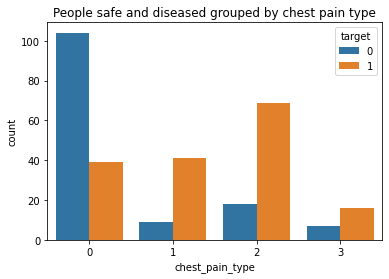

In [ ]:
sns.countplot(x='chest_pain_type', hue="target", data=data)
plt.title("People safe and diseased grouped by chest pain type")
plt.show()

Note:
* Value 0: typical angina
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: asymptomatic 0-3.


Non-aginal pain become the most common type of chest pain among heart disease patients. Furthermore, there are several patients who dont have chest pain but still have heart disease.

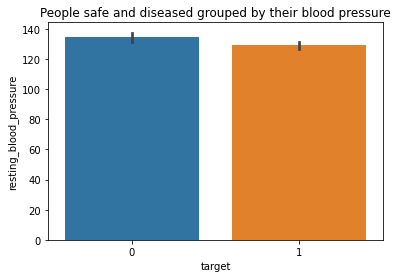

In [ ]:
sns.barplot(x="target", y='resting_blood_pressure',data = data)
plt.title('People safe and diseased grouped by their blood pressure')
plt.show()

heart disease patients have lower blood pressure but not significant.

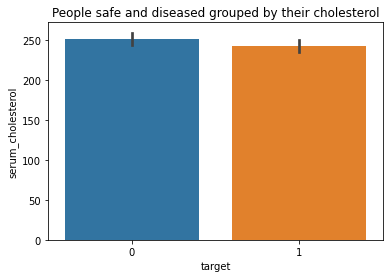

In [ ]:
sns.barplot(x="target", y='serum_cholesterol',data = data)
plt.title('People safe and diseased grouped by their cholesterol')
plt.show()

heart disease patients have lower cholesterol but not significant.

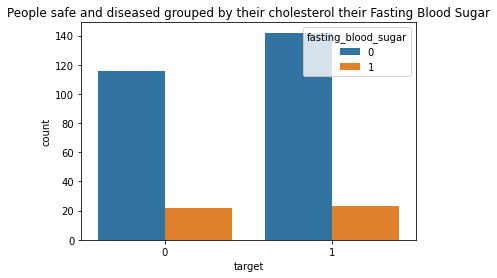

In [ ]:
sns.countplot(hue='fasting_blood_sugar',x ='target',data = data)
plt.title('People safe and diseased grouped by their cholesterol their Fasting Blood Sugar')
plt.show()

* Blue: Fasting Blood Sugar < 120 mg/dl
* Orange: Fasting Blood Sugar > 120 mg/dl

Heart disease is mostly found in people who have fasting blood sugar <120 mg/dl but this cannot be a verdict that a person potentially having a heart disease since the same trend is also found in people who are not have a heart disease.

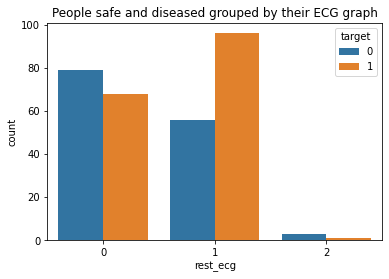

In [ ]:
sns.countplot(x='rest_ecg', hue ='target', data = data)
plt.title('People safe and diseased grouped by their ECG graph')
plt.show()

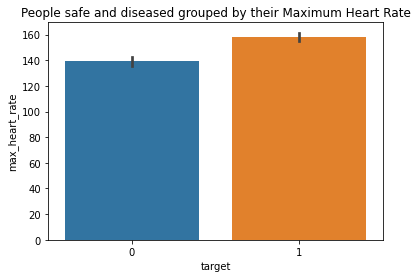

In [ ]:
sns.barplot(x="target", y='max_heart_rate',data= data)
plt.title('People safe and diseased grouped by their Maximum Heart Rate')
plt.show()

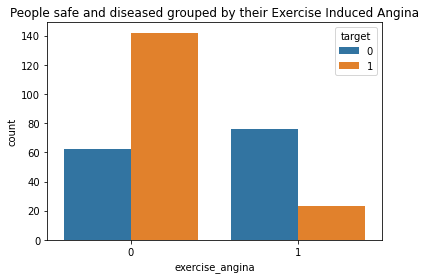

In [ ]:
sns.countplot(x='exercise_angina', hue ='target', data = data)
plt.title('People safe and diseased grouped by their Exercise Induced Angina')
plt.show()

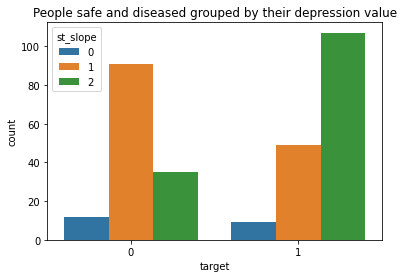

In [ ]:
sns.countplot(hue='st_slope',x ='target',data = data)
plt.title('People safe and diseased grouped by their depression value')
plt.show()

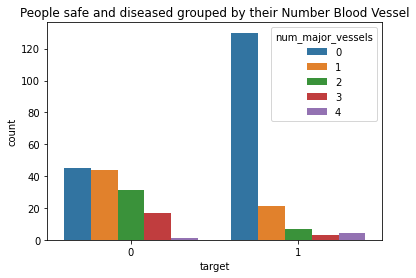

In [ ]:
sns.countplot(hue='num_major_vessels',x ='target',data = data)
plt.title('People safe and diseased grouped by their Number Blood Vessel')
plt.show()

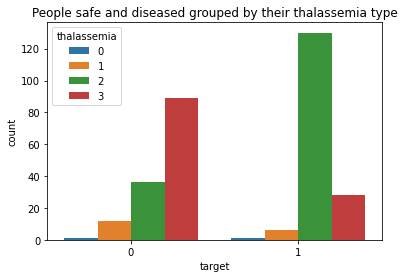

In [ ]:
sns.countplot(hue='thalassemia',x ='target',data = data)
plt.title('People safe and diseased grouped by their thalassemia type')
plt.show()

## Find Correlation between Data

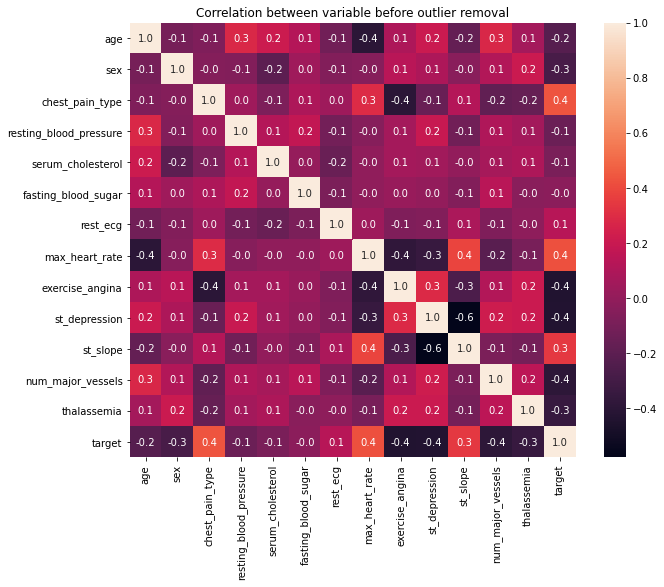

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation between variable before outlier removal')
sns.heatmap(data.corr(), annot=True, fmt='.1f')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 576x288 with 0 Axes>

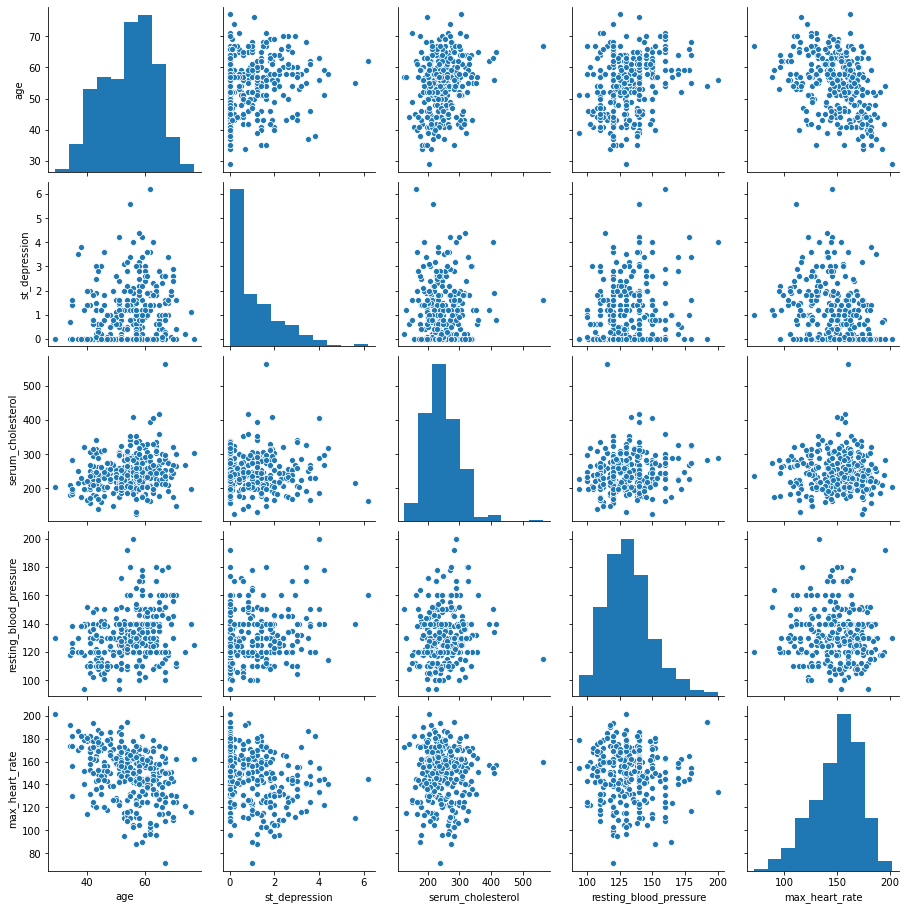

In [ ]:
# sns.scatterplot('age', 'st_depression', data=data)
plt.figure(figsize=(8,4))
sns.pairplot(data[['age', 'st_depression', 'serum_cholesterol', 'resting_blood_pressure', 'max_heart_rate']])
plt.show

Seems that data isn't correlated each other

# Preprocessing


### Binning Age Column

In [ ]:
def assign_col(row):
    if row >= 29 and row <= 40:
        return 1
    elif row > 40 and row <= 55:
        return 2
    else:
        return 3

data['age_bin'] = data['age'].apply(assign_col)
data = data[['age', 'age_bin', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'serum_cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']]
data.head()

,age,age_bin,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,3,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,2,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,3,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,3,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Find Outliers Data

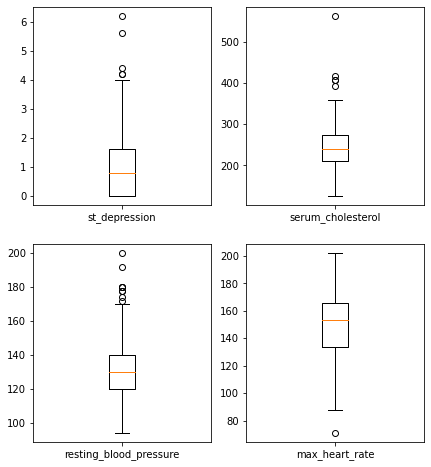

In [ ]:
plt.figure(figsize=(7,8))
plt.title('Boxplot Initial Data')

ax1 = plt.subplot(221)
ax1.boxplot(data['st_depression'])
ax1.set_xticklabels(['st_depression'])

ax2 = plt.subplot(222)
ax2.boxplot(data['serum_cholesterol'])
ax2.set_xticklabels(['serum_cholesterol'])

ax3 = plt.subplot(223)
ax3.boxplot(data['resting_blood_pressure'])
ax3.set_xticklabels(['resting_blood_pressure'])

ax4 = plt.subplot(224)
ax4.boxplot(data['max_heart_rate'])
ax4.set_xticklabels(['max_heart_rate'])

plt.show()

As we can see that each of continuous variable having outliers.

#### Let's handle outliers data

In [ ]:
def remove_outliers(df, column):
    upper = df[column].quantile(.95)
    lower = df[column].quantile(.05)
    
    out = df[(df[column] > upper) | (df[column] < lower)]
    print('Total outlier %s = %d' % (column, len(out)))
    
    df = df[(df[column] < upper) & (df[column] > lower)]
    return df

In [ ]:
# before remove outlier
len(data)

303

In [ ]:
columns = ['st_depression', 'serum_cholesterol', 'resting_blood_pressure', 'max_heart_rate']

# remove outlier
data_clean = data
for i in columns:
    data_clean = remove_outliers(data_clean, i)

data_clean = data_clean.reset_index()

# after remove outlier
print('=====================')
print('After outlier removal = %d ' % len(data_clean))

Total outlier st_depression = 14
Total outlier serum_cholesterol = 20
Total outlier resting_blood_pressure = 16
Total outlier max_heart_rate = 14
After outlier removal = 125 


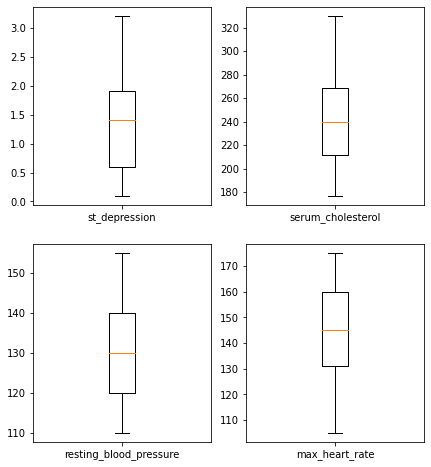

In [ ]:
plt.figure(figsize=(7,8))

ax1 = plt.subplot(221)
ax1.boxplot(data_clean['st_depression'])
ax1.set_xticklabels(['st_depression'])

ax2 = plt.subplot(222)
ax2.boxplot(data_clean['serum_cholesterol'])
ax2.set_xticklabels(['serum_cholesterol'])

ax3 = plt.subplot(223)
ax3.boxplot(data_clean['resting_blood_pressure'])
ax3.set_xticklabels(['resting_blood_pressure'])

ax4 = plt.subplot(224)
ax4.boxplot(data_clean['max_heart_rate'])
ax4.set_xticklabels(['max_heart_rate'])

plt.show()

## Feature Selection

#### Let's try to do Chi-Test

The hypothesis is:

Null Hypothesis (H0): There is no relationship between the variables
Alternative Hypothesis (H1): There is a relationship between variables

In [ ]:
from scipy.stats import chi2_contingency

cat_col = ['age_bin', 'sex', 'chest_pain_type', 'st_slope', 'thalassemia']
chi2_check = []
chi_score = []

for i in cat_col:
    chi_test = chi2_contingency(pd.crosstab(data['target'], data[i]))[1]
    chi_score.append(chi_test)
    if chi_test < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [cat_col, chi2_check, chi_score] 
             ).T 
res.columns = ['Column', 'Hypothesis', 'Chi Score']
res

,Column,Hypothesis,Chi Score
0,age_bin,Reject Null Hypothesis,1.86176e-05
1,sex,Reject Null Hypothesis,1.87678e-06
2,chest_pain_type,Reject Null Hypothesis,1.3343e-17
3,st_slope,Reject Null Hypothesis,4.83068e-11
4,thalassemia,Reject Null Hypothesis,2.23335e-18


So, we can conclude that all categorical variables are important to target variables. We don't need a single one to delete it.

## One Hot Encoding
Without outlier removal


In [ ]:
# data without outlier removal
# convert numbered label to string first
data_enc = data
data_enc.chest_pain_type = data_enc.chest_pain_type.map({1:'angina pectoris', 2:'atypical angina', 3:'non-anginal pain', 4:'SMI', 0:'absent'})

data_enc.st_slope = data_enc.st_slope.map({1:'upsloping', 2:'horizontal', 3:'downsloping', 0:'absent'})

data_enc.thalassemia = data_enc.thalassemia.map({1:'normal', 2:'fixed defect', 3:'reversable defect', 0:'absent'})

data_enc.age_bin = data_enc.age_bin.map({1:'young', 2:'middle', 3:'old', 0:'absent'})
data_enc.head()

### Now, separating feature and target variables

In [ ]:
X = data_enc.iloc[:, 1:-1]
y = data_enc.iloc[:, -1]
X.head(1)

,age_bin,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,old,1,non-anginal pain,145,233,1,0,150,0,2.3,absent,0,normal


### Encoding Phase

In [ ]:
# Categorical columns
cat_cols = ['age_bin', 'chest_pain_type', 'st_slope', 'thalassemia']

for column in cat_cols:
    dummies = pd.get_dummies(X[column], drop_first=True)
    X[dummies.columns] = dummies
    X.drop(column, axis=1, inplace=True)
    
X.head()

,sex,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,num_major_vessels,old,young,angina pectoris,atypical angina,non-anginal pain,horizontal,upsloping,fixed defect,normal,reversable defect
0,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,0,0,1,0
1,1,130,250,0,1,187,0,3.5,0,0,1,0,1,0,0,0,1,0,0
2,0,130,204,0,0,172,0,1.4,0,0,0,1,0,0,1,0,1,0,0
3,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,1,0,1,0,0
4,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,1,0,1,0,0


## Standardize Data
Without outlier removal

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Splitting the data into test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X-Train:",X_train.shape)
print("X-Test:",X_test.shape)
print("Y-Train:",y_train.shape)
print("Y-Test:",y_test.shape)

X-Train: (242, 19)
X-Test: (61, 19)
Y-Train: (242,)
Y-Test: (61,)


In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = ['st_depression', 'serum_cholesterol', 'resting_blood_pressure', 'max_heart_rate']
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,sex,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,num_major_vessels,old,young,angina pectoris,atypical angina,non-anginal pain,horizontal,upsloping,fixed defect,normal,reversable defect
132,1,-0.616856,0.914034,0,1,0.532781,0,-0.920864,0,0,0,1,0,0,1,0,1,0,0
202,1,1.169491,0.439527,0,0,-1.753582,1,-0.193787,0,1,0,0,0,0,1,0,0,0,1
196,1,1.169491,-0.300704,0,1,-0.139679,0,2.350982,0,0,0,0,1,0,0,1,1,0,0
75,0,0.276318,0.059921,0,0,0.487950,0,0.351521,0,0,0,1,0,0,0,1,1,0,0
176,1,-0.795490,-0.319684,1,1,0.443119,1,0.351521,2,1,0,0,0,0,1,0,0,0,1


## One Hot Encoding
With outlier removal



In [1]:
# data without outlier removal
# convert numbered label to string first
data_enc_clean = data_clean
data_enc_clean.chest_pain_type = data_enc_clean.chest_pain_type.map({1:'angina pectoris', 2:'atypical angina', 3:'non-anginal pain', 4:'SMI', 0:'absent'})

data_enc_clean.st_slope = data_enc_clean.st_slope.map({1:'upsloping', 2:'horizontal', 3:'downsloping', 0:'absent'})

data_enc_clean.thalassemia = data_enc_clean.thalassemia.map({1:'normal', 2:'fixed defect', 3:'reversable defect', 0:'absent'})

data_enc_clean.age_bin = data_enc_clean.age_bin.map({1:'young', 2:'middle', 3:'old', 0:'absent'})
data_enc_clean.head()

NameError: ignored

### Now, separating feature and target variables

In [ ]:
X_clean = data_enc_clean.iloc[:, 1:-1]
y_clean = data_enc_clean.iloc[:, -1]
X_clean.head(1)

,age_bin,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,old,1,non-anginal pain,145,233,1,0,150,0,2.3,absent,0,normal


### Encoding Phase

In [ ]:
# Categorical columns
cat_cols = ['age_bin', 'chest_pain_type', 'st_slope', 'thalassemia']

for column in cat_cols:
    dummies = pd.get_dummies(X_clean[column], drop_first=True)
    X_clean[dummies.columns] = dummies
    X_clean.drop(column, axis=1, inplace=True)
    
X_clean.head()

,sex,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,num_major_vessels,old,young,angina pectoris,atypical angina,non-anginal pain,horizontal,upsloping,fixed defect,normal,reversable defect
0,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,0,0,1,0
1,1,130,250,0,1,187,0,3.5,0,0,1,0,1,0,0,0,1,0,0
2,0,130,204,0,0,172,0,1.4,0,0,0,1,0,0,1,0,1,0,0
3,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,1,0,1,0,0
4,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,1,0,1,0,0


## Standardize Data
With outlier removal

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Splitting the data into test and train 
X_clean_train, X_clean_test, y_clean_train, y_clean_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

print("X-Train:",X_clean_train.shape)
print("X-Test:",X_clean_test.shape)
print("Y-Train:",y_clean_train.shape)
print("Y-Test:",y_clean_test.shape)

X-Train: (242, 19)
X-Test: (61, 19)
Y-Train: (242,)
Y-Test: (61,)


In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = ['st_depression', 'serum_cholesterol', 'resting_blood_pressure', 'max_heart_rate']
scaler = StandardScaler()
scaler.fit(X_clean_train[num_cols])

X_clean_train[num_cols] = scaler.transform(X_clean_train[num_cols])
X_clean_test[num_cols] = scaler.transform(X_clean_test[num_cols])

X_clean_train.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,sex,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,num_major_vessels,old,young,angina pectoris,atypical angina,non-anginal pain,horizontal,upsloping,fixed defect,normal,reversable defect
132,1,-0.616856,0.914034,0,1,0.532781,0,-0.920864,0,0,0,1,0,0,1,0,1,0,0
202,1,1.169491,0.439527,0,0,-1.753582,1,-0.193787,0,1,0,0,0,0,1,0,0,0,1
196,1,1.169491,-0.300704,0,1,-0.139679,0,2.350982,0,0,0,0,1,0,0,1,1,0,0
75,0,0.276318,0.059921,0,0,0.487950,0,0.351521,0,0,0,1,0,0,0,1,1,0,0
176,1,-0.795490,-0.319684,1,1,0.443119,1,0.351521,2,1,0,0,0,0,1,0,0,0,1


# Modelling
Without outlier removal

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

### SVM

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print(f"The accuracy on test set using SVM is: {np.round(accuracy, 3)*100.0}%")
print(classification_report(y_test, y_pred))

The accuracy on test set using SVM is: 90.2%
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



Cross Validation

In [ ]:
cv_score = cross_val_score(svm, X_train, y_train, cv=10, scoring='accuracy', n_jobs = -1)
print(cv_score, end='\n\n')
print('Mean accuracy cross validation %f ' % np.mean(cv_score))

[0.84       0.76       0.91666667 0.75       0.79166667 0.70833333
 0.83333333 0.83333333 0.79166667 0.75      ]

Mean accuracy cross validation 0.797500 


Confusion Matrix

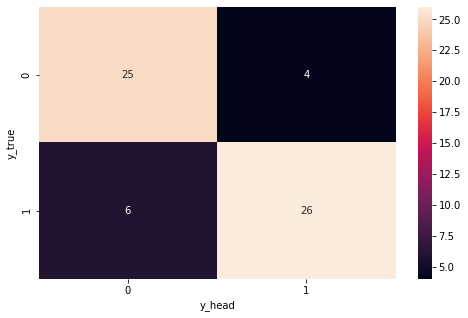

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

### Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(f"The accuracy on test set using Naive Bayes is: {np.round(accuracy, 3)*100.0}%")
print(classification_report(y_test, y_pred))

The accuracy on test set using Naive Bayes is: 86.9%
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



Cross Validation

In [ ]:
cv_score = cross_val_score(gnb, X_train, y_train, cv=10, scoring='accuracy', n_jobs = -1)
print(cv_score, end='\n\n')
print('Mean accuracy cross validation %f ' % np.mean(cv_score))

[0.88       0.84       0.91666667 0.75       0.875      0.66666667
 0.70833333 0.875      0.83333333 0.875     ]

Mean accuracy cross validation 0.822000 


Confusion Matrix

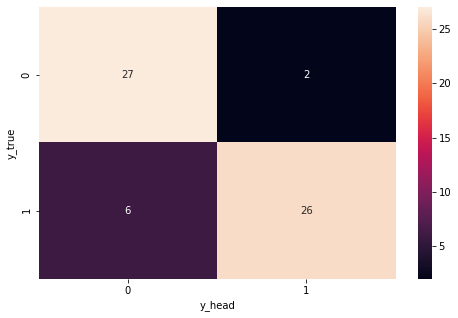

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

### KNN

In [ ]:

# creating a list of K's for performing KNN
my_list = list(range(0,30))

# filtering out only the odd K values
neighbors = list(filter(lambda x: x % 2 != 0, my_list))

# list to hold the cv scores
cv_scores = []

# perform 10-fold cross validation with default weights
for k in neighbors:
  Knn = KNeighborsClassifier(n_neighbors = k, algorithm = 'brute')
  scores = cross_val_score(Knn, X_train, y_train, cv=10, scoring='accuracy', n_jobs = -1)
  cv_scores.append(scores.mean())

# finding the optimal k
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print("The optimal K value is with default weight parameter: ", optimal_k)

The optimal K value is with default weight parameter:  17


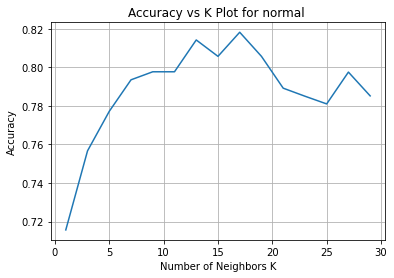

Accuracy scores for each K value is :  [0.716 0.757 0.777 0.794 0.798 0.798 0.814 0.806 0.818 0.806 0.789 0.785
 0.781 0.798 0.785]


In [ ]:
# plotting accuracy vs K
plt.plot(neighbors, cv_scores)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Plot for normal ")
plt.grid()
plt.show()

print("Accuracy scores for each K value is : ", np.round(cv_scores, 3))

In [ ]:
# Finding the accuracy of KNN with optimal K

from sklearn.metrics import accuracy_score

# create instance of classifier
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_k, algorithm = 'kd_tree', 
                                   n_jobs = -1)

# fit the model
knn_optimal.fit(X_train, y_train)

# predict on test vector
y_pred = knn_optimal.predict(X_test)

# evaluate accuracy score
accuracy = accuracy_score(y_test, y_pred)*100
print(f"The accuracy on test set using KNN for optimal K = {optimal_k} is {np.round(accuracy, 3)}%")
print(classification_report(y_test, y_pred))

The accuracy on test set using KNN for optimal K = 17 is 83.607%
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



Cross Validation

In [ ]:
cv_scores = cross_val_score(Knn, X_train, y_train, cv=10, scoring='accuracy', n_jobs = -1)
print(cv_score, end='\n\n')
print('Mean accuracy cross validation %f ' % np.mean(cv_score))

[0.88       0.84       0.91666667 0.75       0.875      0.66666667
 0.70833333 0.875      0.83333333 0.875     ]

Mean accuracy cross validation 0.822000 


Confusion Matrix

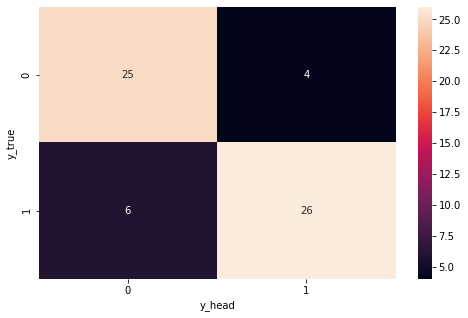

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

# Modelling
With outlier removal

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

### SVM

In [ ]:
svm = SVC()
svm.fit(X_clean_train, y_clean_train)
y_clean_pred = svm.predict(X_clean_test)

accuracy_clean = accuracy_score(y_clean_pred, y_clean_test)
print(f"The accuracy on test set using SVM is: {np.round(accuracy_clean, 3)*100.0}%")
print(classification_report(y_clean_test, y_clean_pred))

The accuracy on test set using SVM is: 90.2%
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



Cross Validation

In [ ]:
cv_score_clean = cross_val_score(svm, X_clean_train, y_clean_train, cv=10, scoring='accuracy', n_jobs = -1)
print(cv_score_clean, end='\n\n')
print('Mean accuracy cross validation %f ' % np.mean(cv_score_clean))

[0.84       0.76       0.91666667 0.75       0.79166667 0.70833333
 0.83333333 0.83333333 0.79166667 0.75      ]

Mean accuracy cross validation 0.797500 


Confusion Matrix

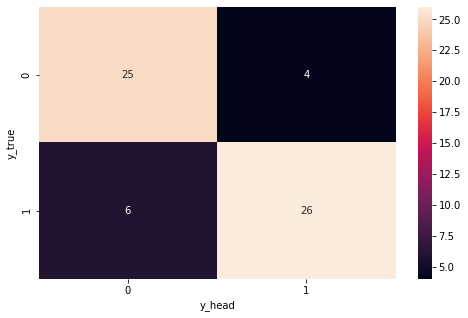

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_clean_test, y_clean_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

### Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_clean_pred = gnb.fit(X_clean_train, y_clean_train).predict(X_clean_test)
accuracy = accuracy_score(y_clean_pred, y_clean_test)
print(f"The accuracy on test set using Naive Bayes is: {np.round(accuracy, 3)*100.0}%")
print(classification_report(y_test, y_clean_pred))

The accuracy on test set using Naive Bayes is: 86.9%
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



Cross Validation

In [ ]:
cv_score = cross_val_score(gnb, X_train, y_train, cv=10, scoring='accuracy', n_jobs = -1)
print(cv_score, end='\n\n')
print('Mean accuracy cross validation %f ' % np.mean(cv_score))

[0.88       0.84       0.91666667 0.75       0.875      0.66666667
 0.70833333 0.875      0.83333333 0.875     ]

Mean accuracy cross validation 0.822000 


Confusion Matrix

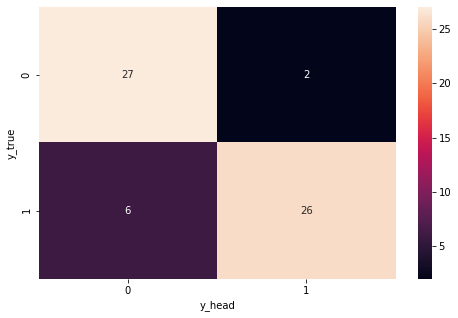

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

### KNN

In [ ]:

# creating a list of K's for performing KNN
my_list = list(range(0,30))

# filtering out only the odd K values
neighbors = list(filter(lambda x: x % 2 != 0, my_list))

# list to hold the cv scores
cv_scores = []

# perform 10-fold cross validation with default weights
for k in neighbors:
  Knn = KNeighborsClassifier(n_neighbors = k, algorithm = 'brute')
  scores = cross_val_score(Knn, X_train, y_train, cv=10, scoring='accuracy', n_jobs = -1)
  cv_scores.append(scores.mean())

# finding the optimal k
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print("The optimal K value is with default weight parameter: ", optimal_k)

The optimal K value is with default weight parameter:  17


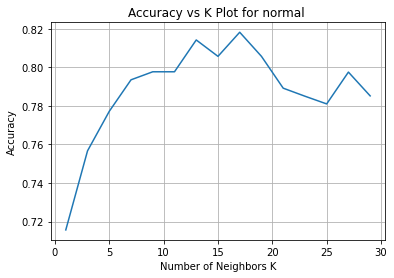

Accuracy scores for each K value is :  [0.716 0.757 0.777 0.794 0.798 0.798 0.814 0.806 0.818 0.806 0.789 0.785
 0.781 0.798 0.785]


In [ ]:
# plotting accuracy vs K
plt.plot(neighbors, cv_scores)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Plot for normal ")
plt.grid()
plt.show()

print("Accuracy scores for each K value is : ", np.round(cv_scores, 3))

In [ ]:
# Finding the accuracy of KNN with optimal K

from sklearn.metrics import accuracy_score

# create instance of classifier
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_k, algorithm = 'kd_tree', 
                                   n_jobs = -1)

# fit the model
knn_optimal.fit(X_train, y_train)

# predict on test vector
y_pred = knn_optimal.predict(X_test)

# evaluate accuracy score
accuracy = accuracy_score(y_test, y_pred)*100
print(f"The accuracy on test set using KNN for optimal K = {optimal_k} is {np.round(accuracy, 3)}%")
print(classification_report(y_test, y_pred))

The accuracy on test set using KNN for optimal K = 17 is 83.607%
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



Cross Validation

In [ ]:
cv_scores = cross_val_score(Knn, X_train, y_train, cv=10, scoring='accuracy', n_jobs = -1)
print(cv_score, end='\n\n')
print('Mean accuracy cross validation %f ' % np.mean(cv_score))

[0.88       0.84       0.91666667 0.75       0.875      0.66666667
 0.70833333 0.875      0.83333333 0.875     ]

Mean accuracy cross validation 0.822000 


Confusion Matrix

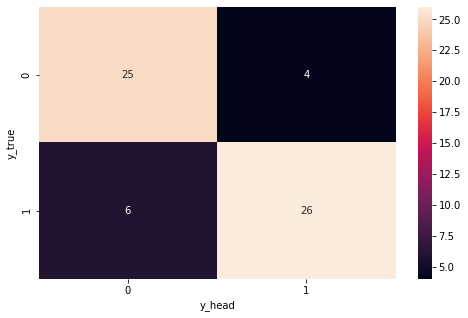

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()